In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset from the CSV file
df = pd.read_csv('/content/totalTWEERTdataset.csv')

# Split the dataset into positive and negative examples
positive_examples = df[df['account.type'] == 1]
negative_examples = df[df['account.type'] == 0]

# Split the positive examples into training and validation sets
pos_train, pos_val = train_test_split(positive_examples, test_size=0.2, random_state=42)

# Split the negative examples into training and validation sets
neg_train, neg_val = train_test_split(negative_examples, test_size=0.2, random_state=42)

# Combine the training and validation sets for positive and negative examples
train_df = pd.concat([pos_train, neg_train])
val_df = pd.concat([pos_val, neg_val])

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['text'])

# Convert the text data to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['text'])
val_sequences = tokenizer.texts_to_sequences(val_df['text'])

# Pad the sequences to a fixed length
train_data = pad_sequences(train_sequences, maxlen=100, padding='post', truncating='post')
val_data = pad_sequences(val_sequences, maxlen=100, padding='post', truncating='post')

# Define the labels
train_labels = train_df['account.type'].values
val_labels = val_df['account.type'].values

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate the model on the validation set
val_predictions = model.predict(val_data)
val_predictions = [int(round(x[0])) for x in val_predictions]

# Compute the confusion matrix
confusion_matrix = tf.math.confusion_matrix(labels=val_labels, predictions=val_predictions)


Epoch 1/10
537/537 [==============================] - 48s 72ms/step - loss: 0.4598 - accuracy: 0.7691 - val_loss: 0.4134 - val_accuracy: 0.8088
Epoch 2/10
537/537 [==============================] - 12s 23ms/step - loss: 0.3205 - accuracy: 0.8599 - val_loss: 0.4278 - val_accuracy: 0.8030
Epoch 3/10
537/537 [==============================] - 9s 17ms/step - loss: 0.2537 - accuracy: 0.8930 - val_loss: 0.4645 - val_accuracy: 0.8004
Epoch 4/10
537/537 [==============================] - 7s 14ms/step - loss: 0.1931 - accuracy: 0.9212 - val_loss: 0.5593 - val_accuracy: 0.7867
Epoch 5/10
537/537 [==============================] - 7s 13ms/step - loss: 0.1426 - accuracy: 0.9443 - val_loss: 0.6433 - val_accuracy: 0.7937
Epoch 6/10
537/537 [==============================] - 8s 16ms/step - loss: 0.1028 - accuracy: 0.9624 - val_loss: 0.7963 - val_accuracy: 0.7753
Epoch 7/10
537/537 [==============================] - 7s 12ms/step - loss: 0.0665 - accuracy: 0.9759 - val_loss: 0.8937 - val_accuracy: 0.78

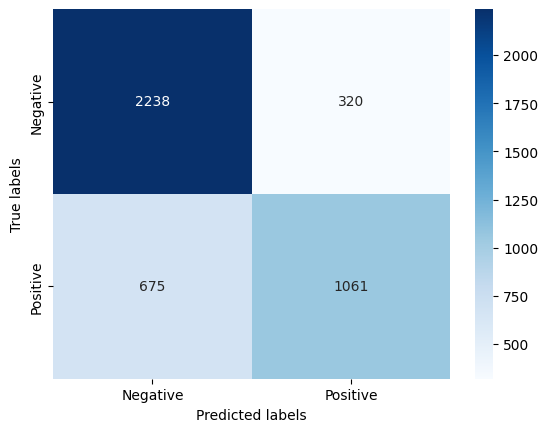

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot the confusion matrix
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

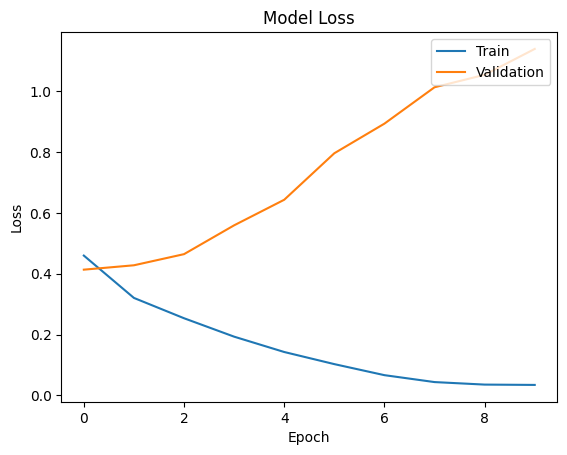

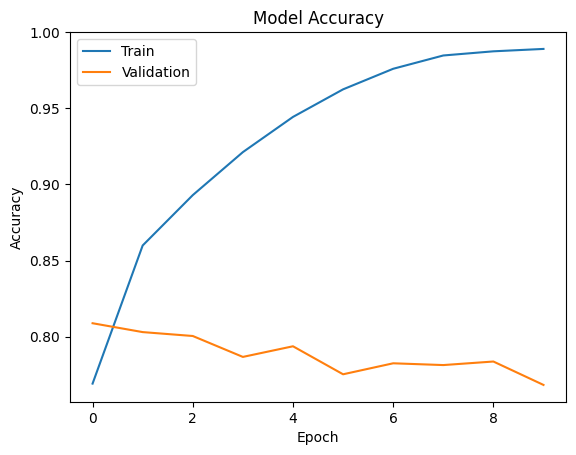

In [4]:
# Plot the loss during training
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the accuracy during training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()